# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapsowar
City not found. Skipping...
Processing Record 2 of Set 1 | iskateley
Processing Record 3 of Set 1 | rodino
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | la sarre
Processing Record 6 of Set 1 | malmberget
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | kailua-kona
Processing Record 9 of Set 1 | sirjan
Processing Record 10 of Set 1 | mumbwa
Processing Record 11 of Set 1 | vadso
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | yermakovskoye
Processing Record 14 of Set 1 | touros
Processing Record 15 of Set 1 | praia da vitoria
Processing Record 16 of Set 1 | baza
Processing Record 17 of Set 1 | tura
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | ka

Processing Record 36 of Set 4 | hwange
Processing Record 37 of Set 4 | burley
Processing Record 38 of Set 4 | wynyard
Processing Record 39 of Set 4 | veraval
Processing Record 40 of Set 4 | yurty
Processing Record 41 of Set 4 | seaside
Processing Record 42 of Set 4 | aginskoye
Processing Record 43 of Set 4 | boguchany
Processing Record 44 of Set 4 | namibe
Processing Record 45 of Set 4 | polyarnyy
Processing Record 46 of Set 4 | el calafate
Processing Record 47 of Set 4 | howrah
Processing Record 48 of Set 4 | douz
Processing Record 49 of Set 4 | pundong
Processing Record 0 of Set 5 | sysert'
Processing Record 1 of Set 5 | rawson
Processing Record 2 of Set 5 | college
Processing Record 3 of Set 5 | kupang
Processing Record 4 of Set 5 | bantay
Processing Record 5 of Set 5 | rosalie
Processing Record 6 of Set 5 | lompoc
Processing Record 7 of Set 5 | haiku-pauwela
Processing Record 8 of Set 5 | safi
Processing Record 9 of Set 5 | thai binh
Processing Record 10 of Set 5 | moree
Processing

Processing Record 31 of Set 8 | ghormach
Processing Record 32 of Set 8 | viedma
Processing Record 33 of Set 8 | babu
Processing Record 34 of Set 8 | ulaangom
Processing Record 35 of Set 8 | worland
Processing Record 36 of Set 8 | udachny
Processing Record 37 of Set 8 | quellon
Processing Record 38 of Set 8 | santander
Processing Record 39 of Set 8 | muroto-misakicho
Processing Record 40 of Set 8 | padang
Processing Record 41 of Set 8 | holualoa
Processing Record 42 of Set 8 | trairi
Processing Record 43 of Set 8 | bereznik
Processing Record 44 of Set 8 | inekar
City not found. Skipping...
Processing Record 45 of Set 8 | hayma'
City not found. Skipping...
Processing Record 46 of Set 8 | oakdale
Processing Record 47 of Set 8 | najaf
Processing Record 48 of Set 8 | jayapura
Processing Record 49 of Set 8 | krasnosilka
Processing Record 0 of Set 9 | mihaileni
Processing Record 1 of Set 9 | ghat
Processing Record 2 of Set 9 | pacasmayo
Processing Record 3 of Set 9 | chatham
Processing Record

Processing Record 20 of Set 12 | antsiranana
Processing Record 21 of Set 12 | raychikhinsk
Processing Record 22 of Set 12 | dondo
Processing Record 23 of Set 12 | ventspils
Processing Record 24 of Set 12 | angaur state
Processing Record 25 of Set 12 | san juan de miraflores
Processing Record 26 of Set 12 | mubende
Processing Record 27 of Set 12 | kovin
Processing Record 28 of Set 12 | manaus
Processing Record 29 of Set 12 | cargados carajos
City not found. Skipping...
Processing Record 30 of Set 12 | carnot
Processing Record 31 of Set 12 | kharp
Processing Record 32 of Set 12 | moussoro
Processing Record 33 of Set 12 | salinopolis
Processing Record 34 of Set 12 | akrehamn
Processing Record 35 of Set 12 | guerrero negro
Processing Record 36 of Set 12 | skagen
Processing Record 37 of Set 12 | broken hill
Processing Record 38 of Set 12 | luganville
Processing Record 39 of Set 12 | achinsk
Processing Record 40 of Set 12 | rongelap
Processing Record 41 of Set 12 | muzayri'
City not found. S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iskateley,67.6803,53.1512,-21.68,99,55,2.85,RU,1701053907
1,rodino,52.5000,80.2500,-0.95,87,100,3.49,RU,1701053907
2,adamstown,-25.0660,-130.1015,22.01,85,100,8.62,PN,1701053907
3,la sarre,48.8002,-79.1996,-1.68,97,100,4.00,CA,1701053908
4,malmberget,67.1753,20.6549,-9.69,86,100,1.54,SE,1701053909


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,-21.68,99,55,2.85,RU,1701053907
1,rodino,52.5000,80.2500,-0.95,87,100,3.49,RU,1701053907
2,adamstown,-25.0660,-130.1015,22.01,85,100,8.62,PN,1701053907
3,la sarre,48.8002,-79.1996,-1.68,97,100,4.00,CA,1701053908
4,malmberget,67.1753,20.6549,-9.69,86,100,1.54,SE,1701053909


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

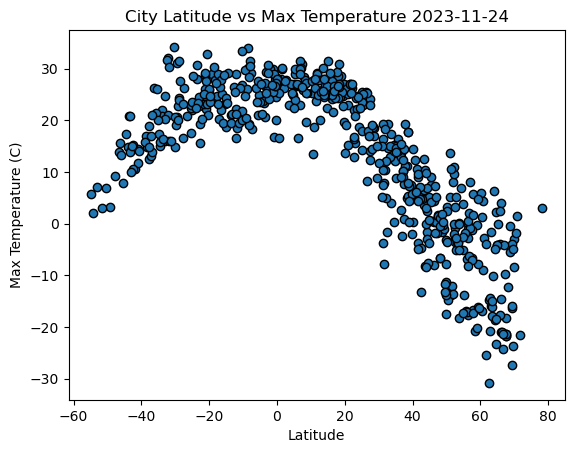

In [8]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df["Lat"]
y_value = city_data_df["Max Temp"]

plt.scatter(x_value, y_value, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

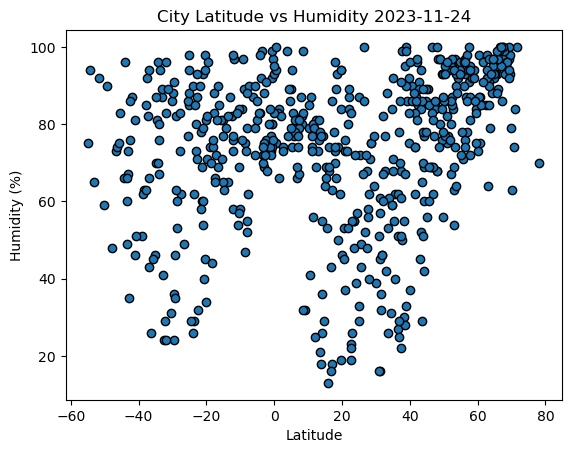

In [10]:
# Build the scatter plots for latitude vs. humidity
x_value = city_data_df["Lat"]
y_value = city_data_df["Humidity"]

plt.scatter(x_value, y_value, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

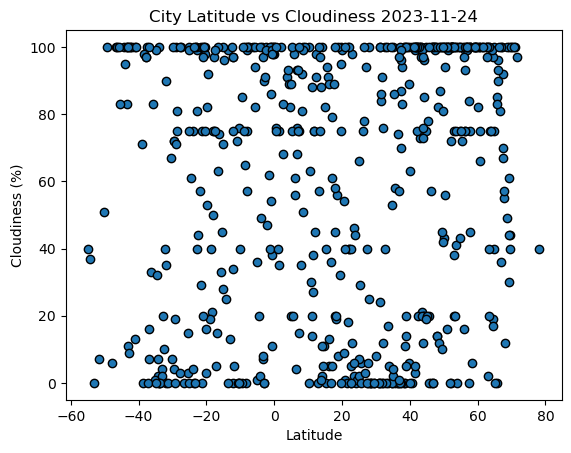

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_value = city_data_df["Lat"]
y_value = city_data_df["Cloudiness"]

plt.scatter(x_value, y_value, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

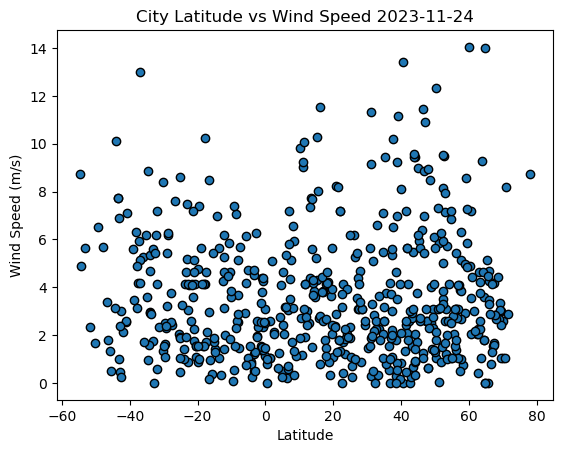

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_value = city_data_df["Lat"]
y_value = city_data_df["Wind Speed"]

plt.scatter(x_value, y_value, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,-21.68,99,55,2.85,RU,1701053907
1,rodino,52.5000,80.2500,-0.95,87,100,3.49,RU,1701053907
3,la sarre,48.8002,-79.1996,-1.68,97,100,4.00,CA,1701053908
4,malmberget,67.1753,20.6549,-9.69,86,100,1.54,SE,1701053909
5,bethel,41.3712,-73.4140,10.57,86,100,7.20,US,1701053909


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,22.01,85,100,8.62,PN,1701053907
8,mumbwa,-14.9783,27.0619,18.72,77,71,1.41,ZM,1701053910
10,port-aux-francais,-49.3500,70.2167,3.22,90,100,6.52,TF,1701053910
12,touros,-5.1989,-35.4608,24.94,81,1,4.74,BR,1701053911
16,port mathurin,-19.6833,63.4167,24.87,71,82,7.41,MU,1701053912


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8855841117563774


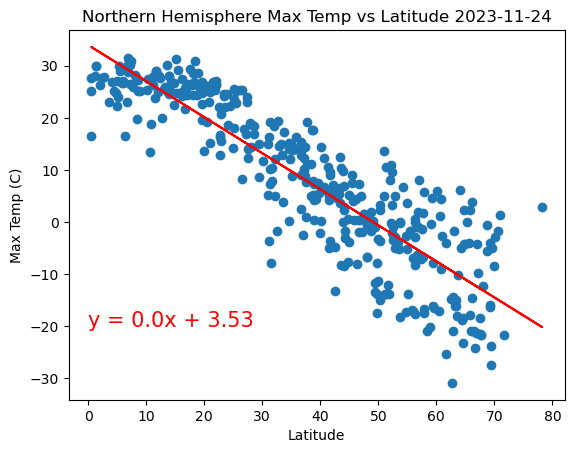

In [17]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]

plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Northern Hemisphere Max Temp vs Latitude 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (0,-20), fontsize = 15, color="red")

#Print results
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.6658148688548764


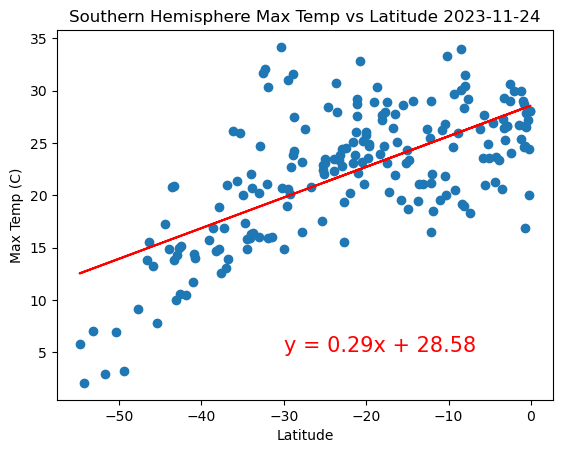

In [19]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]

plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Southern Hemisphere Max Temp vs Latitude 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-30,5), fontsize = 15, color="red")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is a strong correlation between temperature and latitude in the northern and southern hemispheres. Temperature does increase with proximity to the equator, based on random data samples. The northern hemisphere shows a strongly negative correlation, indicating the temperatures drop as you move north away from the equator, and the southern hemisphere shows a medium to strongly positive correlation, indicating that temperatures rise as you move closer to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.39580068774094845


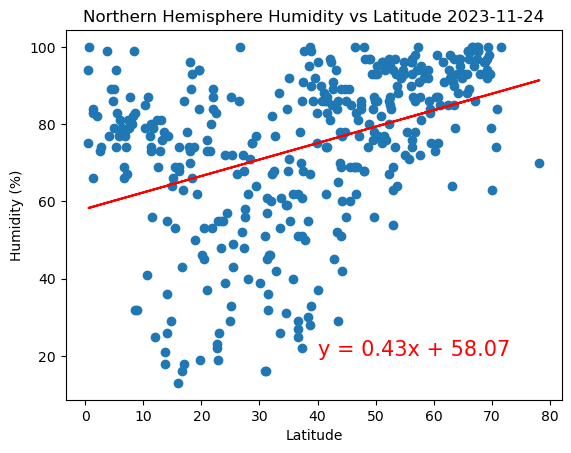

In [21]:
#Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]

plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Northern Hemisphere Humidity vs Latitude 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (40,20), fontsize = 15, color="red")

#Show plot
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.22631485949857094


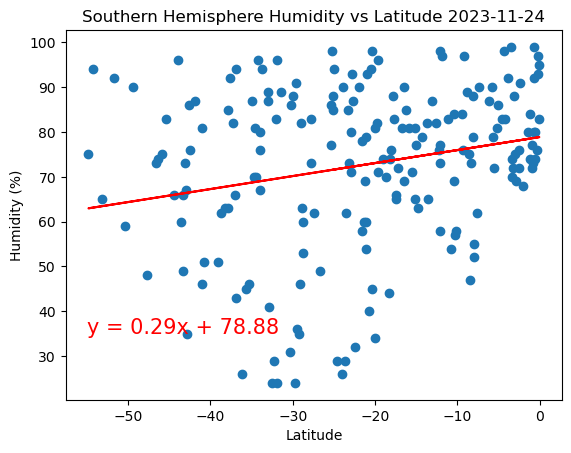

In [23]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]

plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Southern Hemisphere Humidity vs Latitude 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-55,35), fontsize = 15, color="red")

#Show plot
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is a weak correlation between latitude and humidity in the northern and southern hemispheres. There is a slightly positive correlation in the southern hemisphere, suggesting that humidity increases as you approach the equator, but the opposite is represented by the data in the northern hemisphere, showing a positive correlation away from the equator and towards the north pole. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.19730626100816412


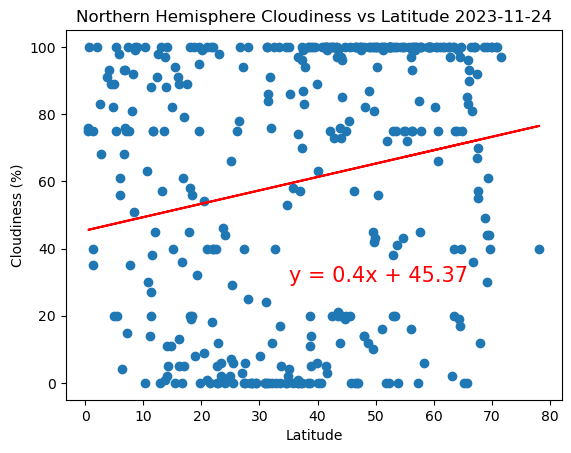

In [25]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]

plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Northern Hemisphere Cloudiness vs Latitude 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (35,30), fontsize = 15, color="red")

#Show plot
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.10239348617342743


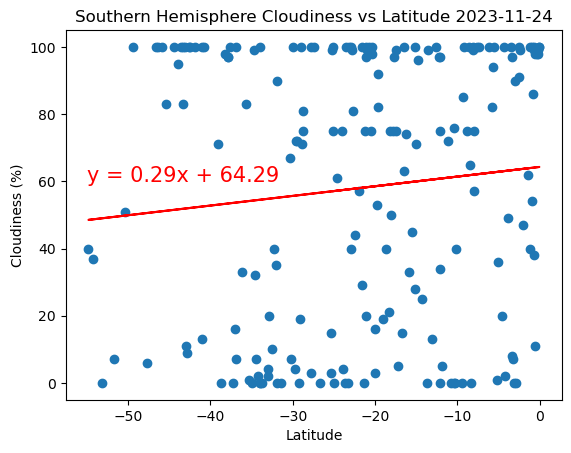

In [28]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]

plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Southern Hemisphere Cloudiness vs Latitude 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-55,60), fontsize = 15, color="red")

#Show plot
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is a weak correlation between cloudiness and latitude in both the northern and southern hemispheres. In other words, closeness to the equator likely does not influence the level of cloudiness. It does appear that there are higher levels of cloud coverage at the extremes: both at the equator and at the north and south poles, with higher frequency at the poles. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04601516631164251


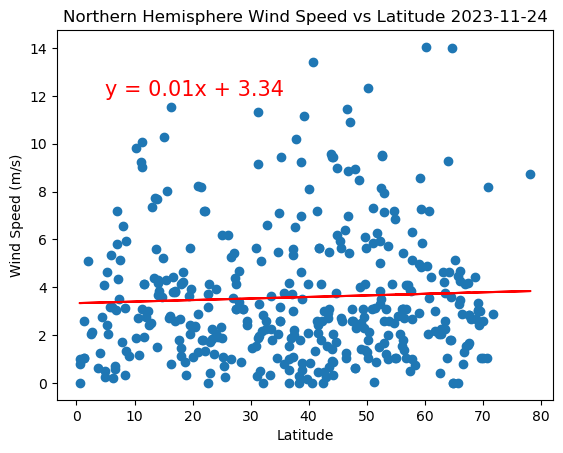

In [30]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]

plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Northern Hemisphere Wind Speed vs Latitude 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (5,12), fontsize = 15, color="red")

#Show plot
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.2302823635132268


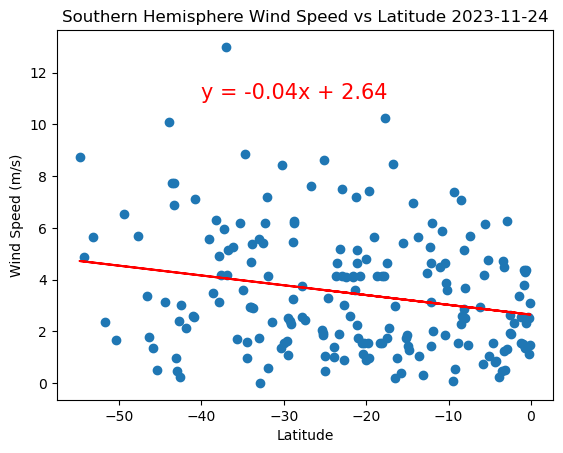

In [34]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]

plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title("Southern Hemisphere Wind Speed vs Latitude 2023-11-24")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-40,11), fontsize = 15, color="red")

#Show plot
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is a weak correlation between wind speed and latitude in the northern and southern hemispheres. Proximity to the equator likely does not affect wind speed. 